# 機械学習の実装 2 （教師あり学習：分類）
前章では教師あり学習の中でも**回帰**と呼ばれる種類の手法を扱いました。  
教師あり学習には他にも**分類**と呼ばれる種類の手法があります。  


具体的な実装手順は同じですが、それぞれ使用目的が異なるので覚えておきましょう。  
本章では分類の実装手順と、代表的な分類のアルゴリズムを紹介して行きます。  

- 回帰：数値を予測する際に用いる（売上、株価、販売数量など）  
- 分類：カテゴリを予測する際に用いる（犬/猫、男性/女性など）   

また、モデルを実装した後には様々な評価指標を用いて予測性能を確認する必要があります。  
本章の後半では具体的なモデルの評価方法を学びつつ、なぜモデルを評価する指標を考慮する必要があるのかという背景も抑えて行きましょう。  

## 本章の構成

- 決定木の実装で分類の全体像を理解
- 代表的な分類のアルゴリズム
- 分類の評価方法
- scikit-learn で評価指標を確認

## 決定木の実装で分類の全体像を理解

前章で実装した回帰と同様に、分類も scikit-learn を使用します。    
まずは練習に scikit-learn の中の有名なアヤメ (iris)の花のデータセットを使用して実装方法を抑えましょう。  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

### データの準備

今回使用するデータセットはアヤメの花に関する情報とその種類になります。  
入力変数として扱うデータは下記になります。今回は下記の情報をもとにアヤメの花の種類を分類する問題設定になります。

| 列名         | 説明         |
| ------------ | ------------ |
| petal length | 花びらの長さ |
| petal width  | 花びらの幅   |
| sepal length | がく片の長さ |
| sepal width  | がく片の幅   |


![アヤメの花の種類](http://drive.google.com/uc?export=view&id=13VlpMGGEDCaPTDnyK88YIgcoklIEpaE6)

In [2]:
# データセットの読み込み
dataset = load_iris()
colms_name = dataset.feature_names
x = dataset.data
t = dataset.target

In [3]:
# 読み込んだデータセットをデータフレーム形式に変換
df = pd.DataFrame(data=x, columns=colms_name)
df['Target'] = t
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


データセットの読み込みが完了したら、サンプル数、入力変数の数を確認しておきましょう。

In [4]:
x.shape

(150, 4)

In [5]:
t.shape

(150,)

データセットを学習用データセットとテスト用データセットに分割します。

In [6]:
# 学習用データセットとテスト用データセットの分割
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=1)

### 分類モデルの学習

データの準備が整いました。分類のアルゴリズムの実装を行なっていきましょう。  
scikit-learn はモデルの定義、学習、検証の 3 ステップでした。回帰の時と同様の手順で実装することができます。  
決定木と呼ばれるアルゴリズムを実装します。  

In [7]:
# モデルの定義
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=0)

In [8]:
# モデルの学習
model.fit(x_train, t_train)

DecisionTreeClassifier(random_state=0)

In [9]:
# モデルの検証
print('train : ', model.score(x_train, t_train))
print('test : ', model.score(x_test, t_test))

train :  1.0
test :  0.9555555555555556


ここで確認できる値は回帰の時に使用した指標である決定係数ではありません。  
分類の評価指標はいくつか種類がありますが、`score()` メソッドで表示される値は**正解率 （Accuracy）** が用いられています。  
例えば、100 回分類を行い 90 回予測を正しく行えた場合、正解率は 90%（ 0.9 ） です。そのため最小の値は 0 となり最大値は 1 になります。  

もう一つの回帰との違いとして、損失関数が挙げられます。  
回帰では平均二乗誤差が損失関数として用いられていましたが、分類では[交差エントロピー](https://ja.wikipedia.org/wiki/%E4%BA%A4%E5%B7%AE%E3%82%A8%E3%83%B3%E3%83%88%E3%83%AD%E3%83%94%E3%83%BC)が主に用いられことも覚えておきましょう。  

このように分類の問題設定でも、scikit-learn を用いての実装は回帰の場合と大きな違いはなく行うことができます。  
推論も同様に `predict()` メソッドで実行することが可能です。

In [10]:
# 推論
model.predict(x_test)

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1])

予測値を確認しましょう。予測値は回帰の時の連続値ではなく、離散値であることが確認できます。  
このように分類のモデルはクラスを表す数値が表示されます。  
今回は 3 種類のアヤメの花の種類の分類の問題設定のため、0 ~ 2 の 3 つのクラスが推論されていることが確認できます。

### 決定木の特徴

木のような構造を用いて、回帰・分類を行うことが可能なアルゴリズムになります。回帰に使用するものを特に回帰木とも呼びます。  
どのように分類を行っているかのイメージを掴むためにまずは下記の画像を確認してください。  

![決定木 木構造](http://drive.google.com/uc?export=view&id=1KKCuriuG4MmLqcpzzs9yvSY7wN1_261S)

決定木は上記の図のように複数の分岐を繰り返すことによって、分類を行います。  
一番上の分岐を見ると、petal length（ cm ） <= 2.35 という条件が確認できます。そして、次のステップではその条件に適合していれば True へ、そうでなければ False へと分岐を繰り返します。このように条件分岐を繰り返すことによって、分類を行います。図内の gini という表記は損失を表しています。  

決定木の特徴や代表的なハイパーパラメータを確認しましょう。  

| 項目                                    | 説明                                                         |
| --------------------------------------- | ------------------------------------------------------------ |
| **強み**                                | 比較的複雑な問題設定にも対応可能。スケールの違いの影響を受けにくい。解釈が比較的容易。 |
| **弱み**                                | 過学習になる場合が多く、汎用性の低いモデルになる傾向がある。           |
| **主なハイパーパラメータ**              |                                                              |
| *max_depth（木構造の深さの上限）*       | 過学習を抑えるためのハイパーパラメータ。上限が低いとモデルの表現力は低下し、過学習を抑える。 |
| *min_samples_split（木構造の分岐の数）* | Max_depth と類似し、数を増やすと表現力が増すが、過学習に陥る可能性が上がる。 |

決定木のアルゴリズムの詳細に関してはこちらの[公式ドキュメント](https://scikit-learn.org/stable/modules/tree.html#classification)を確認してください。


### 木構造と Feature importance の確認

木構造の書き出しには `graphviz` というパッケージを使用します。  
Google Colabratorty にはデフォルトでインストールされていますが、お手元の PC などで使用する際には[こちら](https://graphviz.gitlab.io/download/)からインストールを行ってください。 

In [11]:
# 木構造の書き出し
import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(model)

In [12]:
# 木構造の表示
graph = graphviz.Source(dot_data)  
graph

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

**Feature Importanceの確認**

決定木はそのアルゴリズムの特性から、どの入力変数の影響度が高いかを知ることができます。なぜなら、木構造は分岐を繰り返すことから、分岐の上に行くほど分類に対する影響度が高くなるためです。  

それぞれの入力変数の影響度を確認するには`.feature_importance_` 属性を確認します。

In [13]:
# feature importance
feature_importance = model.feature_importances_
feature_importance

array([0.02146947, 0.02146947, 0.06316954, 0.89389153])

ヒストグラムを用いて可視化を行い、イメージを掴みやすくします。

<BarContainer object of 4 artists>

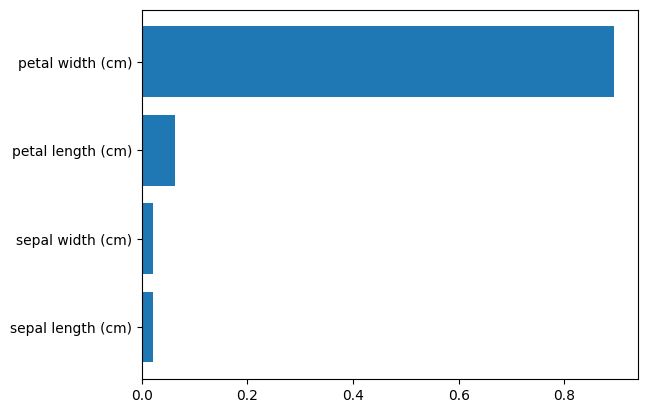

In [14]:
y = colms_name
width = feature_importance

#  横向きの棒グラフで表示
plt.barh(y=y, width=width)

実行結果から petal length という入力変数の影響度が高いことが確認できます。

## 代表的な分類のアルゴリズム


### サポートベクトルマシン

カーネル関数と呼ばれる関数を用い（カーネルトリック）、入力変数${x_i}$を特徴空間への非線形写像$\phi（{x_i}）$し、写像後の特徴空間において線形分類を行うアルゴリズムになります。  

サポートベクトルマシン (Support vector machine) のカーネルトリックの数学は少しレベルが高いため、まずは[こちらの動画](https://www.youtube.com/watch?v=3liCbRZPrZA&feature=youtu.be)を確認し、イメージを掴みましょう。
  

| 項目                   | 説明                                                         |
| ---------------------- | :----------------------------------------------------------- |
| **強み**                   | 未知のデータへの識別性能が比較的強い。ハイパーパラメータの数が少ない。 |
| **弱み**                   | 学習する際に必ずデータの標準化（もしくは正規化）を行う必要がある。 |
| **主なハイパーパラメータ** |                                                  |
| *C（コストパラメータ）*  | 誤った予測に対するペナルティ。大き過ぎると過学習を起こす。 |
| *gamma（ガンマ）*        | モデルの複雑さを決定する。値が大きくなるほどモデルが複雑になり過学習を起こす。 |

In [15]:
# モデルの定義
from sklearn.svm import SVC #Support Vector Classifier
model = SVC()

In [16]:
# モデルの学習
model.fit(x_train, t_train)

SVC()

In [17]:
# モデルの検証
print('train : ', model.score(x_train, t_train))
print('test : ', model.score(x_test, t_test))

train :  0.9619047619047619
test :  0.9777777777777777


サポートベクターマシンは一般的にデータに対して標準化を適用する必要があります。  
今回のデータセットは全て cm を単位としているため、スケールが統一されているため、標準化の必要はありませんが、scikit-learn を用いての実装方法を確認しておきましょう。  

実装方法は基本的にはモデルの学習を行う際と同じ流れになります。

In [18]:
# モデルの定義
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [19]:
# モデルの学習
scaler.fit(x_train)

StandardScaler()

モデルの学習ではデータセットの平均と標準偏差を算出し、標準化を適用できる準備を行っています。  
標準化を行うには `transform()` メソッドを使用します。

In [20]:
# 標準化
x_train2 = scaler.transform(x_train)
x_test2 = scaler.transform(x_test)

平均 0 、標準偏差 1 となっており、データに対して、標準化が適用されていることが確認できます。

In [21]:
# 平均の確認
round(x_train2.mean())

0

In [22]:
# 標準偏差の確認
round(x_train2.std())

1

標準化したデータを用いて学習を行います。

In [23]:
# モデルの定義
model = SVC()

In [24]:
# モデルの学習
model.fit(x_train2, t_train)

SVC()

In [25]:
# モデルの検証
print('train : ', model.score(x_train2, t_train))
print('test : ', model.score(x_test2, t_test))

train :  0.9809523809523809
test :  0.9555555555555556


今回はスケールがもともと統一されていたため、少し精度が低下しましたが、サポートベクトルマシンを使用する際には必ず標準化を行うことを覚えておきましょう。

### k 近傍法

k 近傍法 (k-nearest neighbor) はデータ間の距離を用いて分類を行います。具体的なイメージを掴むためにまず下記の画像を確認してください。  

![k 近傍法 概要](http://drive.google.com/uc?export=view&id=1RnC_L_dAgmLut74To3BdT_NmGVC-cmBv)

上図の中心のオレンジ色のひし形が未知のデータ（学習に使用していない新たなデータ）を表します。  

k 近傍法ではまず、ハイパーパラメータである `k` の値を決定します。  
未知のデータから距離が近いものから k 個サンプルを抽出し、そのサンプルの中で数の多いクラスに未知のデータを分類します。  

図の中では `k=3`、`k=7` の場合の 2 種類の例を確認しましょう。  
`k=3` のケースでは未知のデータから最も近い 3 サンプルはラベル 0 が 2 個、ラベル 1 が 1 個となっています。  
このケースでは未知のデータはラベル 0 と分類されます。  

続いて `k=7` のケースでは未知のデータから最も近い 7 サンプルはラベル 0 が 3 個、ラベル 1 が 4 個となっています。  
このケースでは未知のデータはラベル 4 と分類されます。  

k 近傍法はあらゆる機械学習の中で最もシンプルなアルゴリズムと呼ばれています。  
特徴を確認しましょう。　　　

| 項目                       | 説明                                                         |
| -------------------------- | ------------------------------------------------------------ |
| **強み**                   | 可読性が高い、学習のスピードが早い                           |
| **弱み**                   | ハイパーパラメータの影響を大きく受ける。学習用データセットのサンプル数が増えれば推論に時間を要する |
| **主なハイパーパラメータ** |                                                              |
| *n_neighbors（ k の数）*     | 分類に考慮するサンプル数を決定する                           |

詳細に関しては[こちら](https://ja.wikipedia.org/wiki/K%E8%BF%91%E5%82%8D%E6%B3%95)を確認してください。  

k 近傍法は異常検知の問題設定にも用いられる手法の 1 つです。  
厳密な使用方法は異なりますが、下記の画像を確認してイメージを掴みましょう。  

![k 近傍法 異常検知](http://drive.google.com/uc?export=view&id=1i42iFR2yvjdxX-mRYJ7cudDoErRh7hmM) 

k 近傍法の 1 つの特徴として、サンプル間の距離を知ることが挙げられます。  
図内の 𝜀 はあるサンプルの周囲にある k 個のサンプルの中で最も遠いサンプルとの距離になります。  

異常データの周囲にある k 個のサンプルの中で最も遠いサンプルとの距離である 𝜀′ は正常データ群のものよりも大きくなっていることがわかります。  
この 𝜀 に閾値を設けることにより異常検知を行います。  

scikit-learn を用いてアルゴリズムの実装、データ間の距離を確認する方法を確認します。  
例として k の数を設定するハイパーパラメータ `n_neighbors` は 5 で設定します。

In [26]:
# モデルの定義
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)

In [27]:
# モデルの学習
model.fit(x_train, t_train)

KNeighborsClassifier()

In [28]:
# モデルの検証
print('train : ', model.score(x_train, t_train))
print('test : ', model.score(x_test, t_test))

train :  0.9523809523809523
test :  0.9777777777777777


**学習したデータとの距離の確認**  

`kneighbors()` メソッドで新たなデータと学習に使用したデータとの距離を確認することができます。  
1 つ目の出力が距離を、2 つ目の出力が対応するデータのインデックスを表します。

In [29]:
model.kneighbors([x_train[0]], n_neighbors=5)

(array([[0.        , 0.41231056, 0.54772256, 0.92736185, 0.96436508]]),
 array([[ 0, 13, 49,  9, 47]]))

今回は学習に使用した 0 番目のデータを使用して確認したため、もっとも近いもののインデックスは 0 、その距離も 0 となっています。  
この距離に対して、閾値を設けることにより、異常検知に活用することができます。  

### ロジスティック回帰

ロジスティック回帰 (Logistic regression) は厳密には確率などを予測するための回帰のアルゴリズムに該当します。  
しかし、確率を予測することが可能な特性から、分類の問題設定で用いられることが多いため、本章で紹介します。  

予測値 $y$ を求める数式は下記のようになります。  

$$
{z = {\beta}+w_1x_1+w_2x_2…
}
$$

$$
{y = \frac{1}{1 + exp(-z)}
}
$$


$z$ を求める式が重回帰分析で使用した数式と似ていることがわかると思います。  
${\beta}$ が切片を表し、$w_i$ が重みを表します。  

$\frac{1}{1 + exp(-z)}$ は[シグモイド関数](https://ja.wikipedia.org/wiki/%E3%82%B7%E3%82%B0%E3%83%A2%E3%82%A4%E3%83%89%E9%96%A2%E6%95%B0)といいます。  
図で表すと下記のようになります。  

![シグモイド関数](http://drive.google.com/uc?export=view&id=1NFBsG5YBhNSE9Xkzposp_6gaCG4DQRwr)

出典 : [Wikipedia](https://ja.wikipedia.org/wiki/%E3%82%B7%E3%82%B0%E3%83%A2%E3%82%A4%E3%83%89%E9%96%A2%E6%95%B0#/media/%E3%83%95%E3%82%A1%E3%82%A4%E3%83%AB:SigmoidFunction.png)

図からもわかるように、このシグモイド関数の適用後の $y$ は0~1の間に値をとります。  
そのため、ロジスティック回帰は確率を取得することができると言えます。この確率をどのように分類に適用するかというと、それぞれのクラスに対し確率を予測し、その中で最も確率の高いクラスを予測値として採用します。  

概要は下記になります。  

| 項目                       | 説明                                                         |
| -------------------------- | :----------------------------------------------------------- |
| **強み**                   | 説明能力が高い。入力変数の重要度、オッズ比がわかる。 |
| **弱み**                   | 複雑な問題設定に対応できない場合がある。                     |
| **主なハイパーパラメータ** |                                                              |
| *C（コストパラメータ）*    | 誤った予測に対するペナルティ。大き過ぎると過学習を起こす。     |
| *penalty*                  | 正則化を行う方法を決定する。l1、l2 のノルムから選択する。         |

詳細については[こちら](https://ja.wikipedia.org/wiki/%E3%83%AD%E3%82%B8%E3%82%B9%E3%83%86%E3%82%A3%E3%83%83%E3%82%AF%E5%9B%9E%E5%B8%B0)を参照してください。

In [30]:
# モデルの定義
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1.0)

In [31]:
# モデルの学習
model.fit(x_train, t_train)

LogisticRegression()

In [32]:
# モデルの検証
print('train : ', model.score(x_train, t_train))
print('test : ', model.score(x_test, t_test))

train :  0.9809523809523809
test :  0.9777777777777777


#### 重みの確認

重回帰分析で行なった方法と同様に重み係数を確認します。

In [33]:
print(model.coef_[0])

[-0.43462968  0.76021293 -2.24087351 -0.93260628]


<BarContainer object of 4 artists>

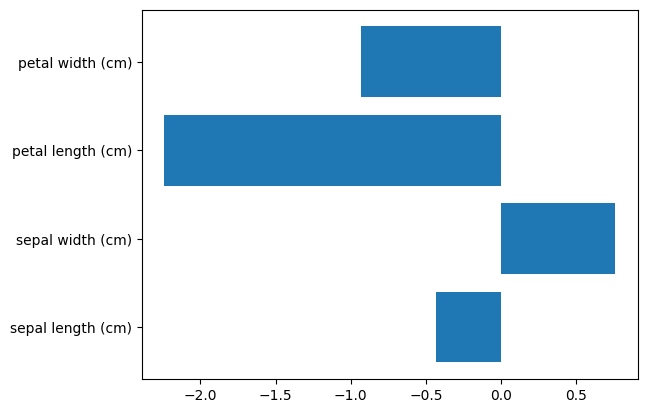

In [34]:
plt.barh(y=dataset.feature_names ,width=model.coef_[0])

#### オッズ比の確認

オッズ比は重みに対して、 `np.exp()` で算出することができます。  
注意点としてロジスティック回帰ではそのアルゴリズムの特性上重みから入力変数の影響度を判断することは難しく、一般的にこちらのオッズ比を用いて、影響度を確認することを覚えておきましょう。  

オッズ比は分類結果への影響度を確認する際に使用することができます。  
オッズ比の詳細は[こちら](https://ja.wikipedia.org/wiki/%E3%82%AA%E3%83%83%E3%82%BA%E6%AF%94)を確認してください。  

In [35]:
print(np.exp(model.coef_[0]))

[0.64750441 2.13873156 0.10636555 0.39352673]


<BarContainer object of 4 artists>

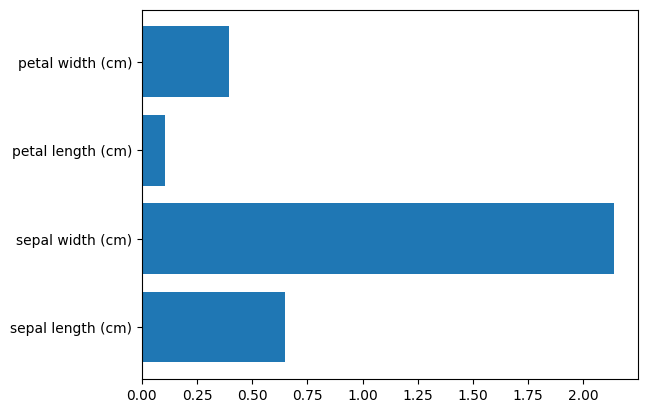

In [36]:
plt.barh(y=dataset.feature_names ,width=np.exp(model.coef_[0]))

#### 予測値の確率の確認

分類のアルゴリズムには確率を予測できるものとそうでないものに分けることができます。  
ロジスティック回帰のような確率を予測できるアルゴリズムでは `predict()` メソッドを用いる事により、推論を行い分類結果を取得でき、`predict_proba()` メソッドを使用することにより、推論を実行し、確率を取得することができます。  

また、scikit-learn を用いて推論を行う際の入力値は行列である必要があります。例えばテストデータの 1 サンプル目を使用して、推論を行う際には `[x_test[0]]` とスライスした値を更に `[]` で囲う、もしくは `reshape()` メソッドでベクトルから行列に変換する必要があります。

In [37]:
# ラベルの取得
model.predict([x_test[0]])

array([0])

各ラベルに対する確率を確認しましょう。

In [38]:
# 各ラベルに対する確率の確認
model.predict_proba([x_test[0]])

array([[9.85025396e-01, 1.49745188e-02, 8.47912061e-08]])

ラベル 0 に対する確率が最も高いことが確認できました。

### 練習問題 分類のアルゴリズム

これまでで学んだ内容を復習しましょう。下記の内容を次のセルに記述し、実行結果を確認してください。（必要に応じてセルの追加を行ってください。）  
下記の内容を実行し、ロジスティック回帰を用いて、分類を行ってください。  

- コードセルを実行し、データセットを読み込み入力変数 `x` と目標値 `t` の取得
- 訓練用データセットとテスト用データセットに分割（テストデータの割合 : 30% 、random_state : 0）
- ロジスティック回帰の実装（モデルの定義、モデルの学習、モデルの検証、推論）

In [39]:
# データセットの読み込み
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
x = dataset.data
t = dataset.target
columns = dataset.feature_names
df = pd.DataFrame(x, columns=columns)
df['Target'] = t

In [40]:
# 読み込みんだデータセットの確認
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [41]:
# 訓練用データセットとテスト用データセットに分割（テストデータの割合 : 30% 、random_state : 0）


In [42]:
# モデルの定義


In [43]:
# モデルの学習


In [44]:
# モデルの検証（訓練用データセット）


In [45]:
# モデルの検証（テスト用データセット）


In [46]:
# 推論（テスト用データセット）


#### 模範解答

In [47]:
# データセットの読み込み
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
x = dataset.data
t = dataset.target
columns = dataset.feature_names
df = pd.DataFrame(x, columns=columns)
df['Target'] = t

In [48]:
# 読み込みんだデータセットの確認
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [49]:
# 訓練用データセットとテスト用データセットに分割（テストデータの割合 : 30% 、random_state : 0）
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=0)

In [50]:
# モデルの定義
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1.0)

In [51]:
# モデルの学習
model.fit(x_train, t_train)

/Users/yamakawa_kohsuke/git/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [52]:
# モデルの検証
print('train : ', model.score(x_train, t_train))
print('test : ', model.score(x_test, t_test))

train :  0.9396984924623115
test :  0.9590643274853801


In [53]:
# 推論（テスト用データセット）
y_pred = model.predict(x_test)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1])

ロジスティック回帰は分類を行う際の確率も取得することが可能です。

In [54]:
# 推論：確率
y_proba = model.predict_proba(x_test)
y_proba[:5]

array([[9.93484572e-01, 6.51542786e-03],
       [2.95818721e-02, 9.70418128e-01],
       [2.30725252e-03, 9.97692747e-01],
       [2.61548068e-01, 7.38451932e-01],
       [1.24501138e-04, 9.99875499e-01]])

## 分類の問題設定の評価方法

### モデルを評価する指標  

モデルを評価する指標には様々なものがあります。  
代表的なものには下記が挙げられます。  

- Accuracy （正解率）
- Precision （適合率）
- Recall （再現率）
- F1 score （ F 値）  


ここまで基本的に Accuracy （正解率）を用いて、分類のモデルの評価を行なってきました。   
しかし、実問題ではこの Accuracy のみを用いて、モデルの良し悪しを決めてしまうとある危険性がある場合があります。  

例えば、ラベルの種類が 2 種類しかないような 2 値分類の問題設定でデータセットの中身の 99% がラベル 0 、そして残りの 1% がラベル 1 というような割合の場合に Accuracy を最大化するためにどうするでしょうか。
全てをラベル 0 と答え、ラベル 1 に対しては全く分類しないという選択を取ることが考えられます。  

なぜならそのような選択を取ることにより、Accuracy は必然的に 99% になると言えるためです。  
このような結果が望ましい問題設定もあれば、望ましくない問題設定もあることが考えられます。  

がん患者の診断の例を用いて Accuracy 以外のモデルの評価指標について確認しましょう。   

|          | 人数 |
| -------- | ---- |
| **全体** | 260  |
| **健康な人** | 200   |
| **がん患者** | 60    |

上記のデータは目標値（実際の値）にあたります。  
Precision などの Accuracy 以外の指標を理解するためにはこの目標値（実際の状態）と予測値（診察結果）の関係性を理解することが重要です。  

診察結果（予測結果）を下記のような結果だとします。  
下記の表は診察結果（列方向）と実際の状態（行方向）の関係を表した表になります。

|  実際の状態(t)/診察結果(y) | 診断 : がん | 診断 : 健康 |
| --------------------------- | ---------- | -------------- |
| **実際 : がん**              | 10(TP)         | 50(FN)             |
| **実際 : 健康**              | 5(FP)         | 195(TN)              |

Precision などの指標について考えるにはこのような表、**混同行列 (Confusion matrix)** にして考えるのが一般的です。  
それぞれの値には名前がついており、今回の例では下記のような意味を持ちます。  

- TP → True Positive : 実際にがんであり、診断結果もがん
- FP → False Positive : 実際は健康であり、診断結果はがん
- FN → False Negative : 実際はがんであり、診断結果は健康
- TN → True Negative : 実際は健康であり、診断結果も健康

この混同行列を軸に分類の指標を確認していきます。  


### Accuracy（正解率）

この診察結果の場合、Accuracy は下記になります。

*Accuracy（正解率）を求める式*  

$\frac{TP+TN}{TP+FP+TN+FN} = Accuracy$

$\frac{10+195}{10+5+50+195}=約79\%$


このように全ての値を足し合わせて、実際にどれだけあっているのかを測るのが、Accuracy です。  
Accuracy は分類の精度を確認する為の指標として最も一般的なものです。  


### Precision（適合率）

次に紹介する Precision , Recall の評価指標は基準を置くラベルを決定する必要があります。  
なぜなら Positive と Negative は決まったものではなく、Positive も Negative になりえ、Negative も Positive になりうる関係だからです。今回の例は上記の混同行列に合わせ、診断結果ががんだったものを Positive として扱い、Positive に着目し、それぞれの値を算出する例を紹介します。

*Precision（適合率）を求める式*  

$\frac{TP}{TP+FP} = Precision$  

$\frac{実際がん患者}{がんと診断された人の総数}$  

$\frac{10}{10+5} = 約67\%$  

  
使う場面は、 **間違いを少なく予測したい場合、だが取りこぼしは許される場面**になります。  
下記の例を参考にもう少し具体的にイメージしてみましょう。

> *例：裁判官が被疑者は無罪であることを前提に、冤罪を避けるために、有罪判決を下した場合は、
> 有罪判決を受けた全ての被疑者は実際に有罪であるべきケース
> （実際に有罪でありながら、無罪判決を行うのは問題ない）*

このように基準となるクラスに対する予測値が間違っていることを避けたい場合に使用するのが Precision にあたります。  


### Recall（再現率）

*Recall（再現率）を求める式*   

$\frac{TP}{TP+FN} = Recall$    

$\frac{がんと診断された人で実際がん患者}{実際がん患者の総数}$    

$\frac{10}{10+50} = 約16\%$  


Recall は Precision とはトレードオフの関係にあります。  
使う場面は、**取りこぼしを許したくない場合、だが間違いは許される場面**になります。  

> *例：がん患者は全員見つけたい、健康な人はがんと診断しても問題ない（再診すればいい）  
> （健康な人はがん患者と診断されても、再診すれば問題ないという前提のもと）*  

今回のケースではこの Recall を評価指標として取り扱うことがいいと考えられでしょう。  
もちろんどの指標を使用するかはそれぞれの問題設定に合わせて、選定する必要がある点を抑えておきましょう。  


### F1 score（ F 値）

Precision と Recall は少し極端な指標になります。なぜならどちらか一方のラベルに対しての Recall の値を 100% にするためには全てをそのラベルと予測することにより実現してしまうためです。  
そこで考案されたのが、F1 score になります。両方の指標をバランスよく考慮したい場合などに用いられます。  
計算方法は下記になります。

*F値を求める式*   

$\frac{2 \cdot Recall \cdot Precision}{Recall + Precision}=F{-} measure$

上記で紹介した指標は簡単に scikit-learn の中で確認することが可能です。

## scikit-learn で評価指標を確認

### データの準備

分類モデルにおける評価指標を議論する際には**不均衡データ**と呼ばれるデータ量に偏りがあるデータを使用すると分かり易いです。  
データセットはこちらから [classification_imb.csv](http://drive.google.com/uc?export=view&id=1sEmAcyqePHcfphZWX-G8T9LLXMveWh0Z) をダウンロードして、Colab 上にアップロードして下さい。

In [55]:
# from google.colab import files 
# uploaded = files.upload()

In [56]:
# 必要なモジュールの読み込み
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [57]:
df = pd.read_csv('./classification_imb.csv')
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x49,x50,x51,x52,x53,x54,x55,x56,x57,Target
0,0,2,0,0,6,1,0,0,0,0,...,4,3,9,0,1,1,0,1,0,1
1,1,3,8,0,0,1,0,0,0,0,...,3,3,8,0,1,1,1,1,0,1
2,2,1,1,1,0,0,0,0,1,0,...,1,2,8,0,1,1,1,0,0,1
3,5,1,9,0,0,1,0,0,0,0,...,1,3,8,0,1,1,0,0,0,1
4,0,1,2,0,0,1,0,0,0,0,...,0,3,6,0,1,0,1,0,1,1


In [58]:
df.shape

(29760, 58)

seaborn を用いて可視化します。`sns.countplot()` でデータの個数を集計し、可視化することができます。    
目標値は今回 Target という列になります。

<Axes: ylabel='count'>

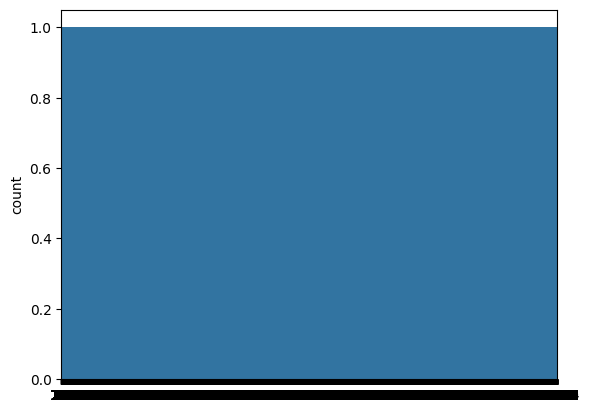

In [59]:
sns.countplot(df['Target'])

今回は 0 と 1 のラベルがついた 2 値分類になります。  
0 のラベルの数が少なく、不均衡なデータ （Imbalanced Data） の問題設定になります。

入力変数 x と目標値 t の切り分けを行い、学習用データセットとテスト用データセットへの分割を行います。

In [60]:
# 入力変数 x と目標値 t の切り分け
x = df.iloc[:, :-1].values
t = df['Target'].values
print(x.shape, t.shape)

(29760, 57) (29760,)


In [61]:
# 学習用データセットとテスト用データセットの分割
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=0)

### モデル構築

ロジスティック回帰を使用してモデル構築を行います。  

In [62]:
# モデルの定義
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [63]:
# モデルの学習
model.fit(x_train, t_train)

# モデルの検証
print(model.score(x_train, t_train))
print(model.score(x_test, t_test))

0.9632776497695853
0.961581541218638


上記のモデルの検証の部分で表示されている数値は Accuracy を表しています。  
検証データに対しても、約 96% という予測精度のモデルができたように思えます。 

実際に推論してみて、推論結果も確認してみます。  
今回はテスト用データセット全てに対して予測を行います。

In [64]:
# 推論
y_pred = model.predict(x_test)

予測値の中身を確認します。  
NumPy の `.unique()` を使用することでベクトル内の重複を取り除いた、固有の値を確認することができます。

In [65]:
np.unique(y_pred)

array([1])

予測値全てがラベル 1 となっています。  
目標値を確認して、この推論結果が正しいものか確認します。

In [66]:
np.unique(t_test, return_counts=True)

(array([0, 1]), array([ 343, 8585]))

`return_counts` の引数を `True` と設定することにより、重複を取り除いた固有の値の数を集計することができます。  
実際にはラベル 0 も 343 サンプルあることが確認できます。  

このように Accuracy のみを指標として取り扱うと今回の不均衡なデータセットを取り扱う際などにはうまくその予測精度を評価することができない場合があることも覚えておきましょう。

### 混同行列

その他の評価指標でも確認します。   
まず、目標値と予測値を混同行列の形に落とし込みます。  

scikit-learn で評価指標を確認する際には、`sklearn.metrics` モジュール内の関数を使用します。  

In [67]:
from sklearn import metrics

In [68]:
# ラベルの取り出し
labels = list(np.unique(t_train))
labels

[np.int64(0), np.int64(1)]

In [69]:
# 混同行列の取得
c_matrix = metrics.confusion_matrix(t_test, y_pred)

scikit-learn で取得した混同行列は NumPy の形式で格納されているため、Pandas のデータフレーム型にして、見やすく整形して表示します。

In [70]:
# データフレームに整形
df_matrix = pd.DataFrame(c_matrix, columns=['がんと診断', '健康と診断'], index=['実際はがん', '実際は健康'])
df_matrix

,がんと診断,健康と診断
実際はがん,0,343
実際は健康,0,8585


### Precision

Precisionなどのスコアは `metrics` モジュール内の関数に、目標値と予測値を渡すことで確認することができます。  
引数に `average=None` と指定することによって、それぞれのラベルを基準にしたスコアを確認することができます。

In [71]:
precision = metrics.precision_score(t_test, y_pred, average=None)
precision

array([0.        , 0.96158154])

ラベル 0 に関しては予測数が 0 であるため、値が 0 となっています。  
ラベル 1 に関しては予測した内の約 4 % 程度が間違っていることがわかります。

### Recall

In [72]:
recall = metrics.recall_score(t_test, y_pred, average=None)
recall

array([0., 1.])

ラベル 0 に関しては予測数が 0 であるため、値が 0 となっています。  
ラベル 1 に関しては目標値が 1 のラベルを全て予測できているため値が 100 % となっています。  

### F1 score

In [73]:
f1 = metrics.f1_score(t_test, y_pred, average=None)
f1

array([0.        , 0.98041455])

F1 score ではちょうど Precision と Recall の間のような値を取得できていることが確認できます。  

上記の評価指標の値を一括でまとめて確認する際には `metrics.precision_recall_fscore_support` を使用します。  

In [74]:
# Precision, Recall, F値, 実際のそれぞれの値の合計をそれぞれ取得
from sklearn.metrics import precision_recall_fscore_support
pre, rec, fs, total =  precision_recall_fscore_support(t_test, y_pred)

In [75]:
# データフレームに整形
pd.DataFrame(np.array([total, pre, rec, fs]), index=['Total', 'Precision', 'Recall', 'F1 score'], columns=['ラベル 0','ラベル 1'])

,ラベル 0,ラベル 1
Total,343.0,8585.000000
Precision,0.0,0.961582
Recall,0.0,1.000000
F1 score,0.0,0.980415


このように分類の問題設定に取り組む際は、データの偏りなどに応じて評価指標を正しく選択し、評価を行うことが重要です。  

## 練習問題 本章のまとめ

本章で学んだ内容を復習しましょう。下記の内容を次のセルに記述し、実行結果を確認してください。（必要に応じてセルの追加を行ってください。）  


- コードセルを実行し、データセットを読み込み入力変数 `x` と目標値 `t` の取得
- 学習用データセットとテスト用データセットに分割（テストデータの割合 : 30% 、random_state : 0）
- ロジスティック回帰の実装（モデルの定義、モデルの学習、モデルの検証）
- テスト用データセットに対して推論を実行し、予測値を変数 `y_test` に格納
- `t_test` と `y_test` を用いて混同行列の表示
- 異なる分類指標で予測精度の確認（ Precision、Recall、F1 score ）

*ヒント*  
Precision などの値を確認する際に、引数の `average` を `None` に設定して、平均ではなくそれぞれの列を基準にした Precision、Recall、F1 score を確認しましょう。

In [76]:
# データセットの読み込み
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
x = dataset.data
t = dataset.target
columns = dataset.feature_names
df = pd.DataFrame(x, columns=columns)
df['Target'] = t

In [77]:
# 訓練用データセットとテスト用データセットに分割（テストデータの割合 : 30% 、random_state : 0）
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=0)

In [78]:
# モデルの定義
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1.0)

In [79]:
# モデルの学習
model.fit(x_train,t_train)

LogisticRegression()

In [80]:
# モデルの検証
print(model.score(x_train, t_train))
print(model.score(x_test, t_test))

0.9396984924623115
0.9590643274853801


In [81]:
# 推論結果を y_test に格納
y_test = model.predict(x_test)

In [82]:
# 混同行列の表示
from sklearn import metrics
c_matrix = metrics.confusion_matrix(t_test, y_test)
# df_matrix = pd.DataFrame(c_matrix, columns=['がんと診断', '健康と診断'], index=['実際はがん', '実際は健康'])
df_matrix


,がんと診断,健康と診断
実際はがん,0,343
実際は健康,0,8585


In [83]:
# Precision の取得（ average を None に設定）
precision = metrics.precision_score(t_test, y_test,average=None)
print(precision)

[0.92424242 0.98095238]


In [84]:
# Recall の取得（ average を None に設定）
recall = metrics.recall_score(t_test, y_test, average=None)
print(recall)

[0.96825397 0.9537037 ]


In [85]:
# F1 score の取得（ average を None に設定）
f1 = metrics.f1_score(t_test, y_test, average=None)
print(f1)

[0.94573643 0.96713615]


<img src="http://drive.google.com/uc?export=view&id=1g2xjXbw5qYeqdJqcOf3uASvzBQxhlE8u" width=30%>